In [66]:
import pandas as pd
import numpy as np

df = pd.read_csv('real-estate-sales.csv')
display(df)

PropertyID  xrCompositeLandUseID  xrBuildingTypeID     ParcelID  \
0             30                     3               4.0  144-698-048   
1             50                     3               4.0  121-698-073   
2             58                     3               6.0  121-699-090   
3             66                     3               6.0  144-699-037   
4             78                     3               3.0  144-699-025   
5             79                     3               4.0  144-699-024   
6             94                     3               5.0  121-699-105   
7             94                     3               5.0  121-699-105   
8             98                     3               6.0  121-699-101   
9             98                     3               6.0  121-699-101   
10           103                     3               5.0  121-699-096   
11           127                     7              16.0  122-700-001   
12           142                     7              16.0  122-700-016   
13           165                     3               3.0  121-697-014   
14           189                     3               4.0  121-702-046   
15           192                     3               4.0  121-702-043   
16           200                     4              11.0  121-702-035   
17           203                     3               6.0  121-702-032   
18           235                     3               3.0  121-704-054   
19           235                     3               3.0  121-704-054   
20           258                     4              11.0  143-709-058   
21           263                     3               4.0  143-709-053   
22           328                     3               6.0  120-696-031   
23           364                     3               4.0  120-701-072   
24           415                     4              11.0  120-703-098   
25           467                     3               8.0  143-707-102   
26           489                     3               5.0  143-708-115   
27            11                     3               6.0  121-698-060   
28            35                     3               4.0  144-698-043   
29            56                     3               6.0  121-699-092   
30            56                     3               6.0  121-699-092   
31            58                     3               6.0  121-699-090   
32            60                     3               6.0  121-699-088   
33            75                     3               3.0  144-699-028   
34            78                     3               3.0  144-699-025   
35            79                     3               4.0  144-699-024   
36            79                     3               4.0  144-699-024   
37         12777                     5              12.0  203-422-098   
38            79                     3               4.0  144-699-024   
39            94                     3               5.0  121-699-105   
40           101                     3               5.0  121-699-098   
41           101                     3               5.0  121-699-098   
42           103                     3               5.0  121-699-096   
43           118                     3               5.0  144-700-006   
44           122                     3               6.0  144-700-002   
45           127                     7              16.0  122-700-001   
46           142                     7              16.0  122-700-016   
47           156                     3               6.0  121-697-023   
48           165                     3               3.0  121-697-014   
49           192                     3               4.0  121-702-043   
50           206                     3               3.0  121-702-029   
51           214                     4              11.0  143-704-004   
52           227                     3               3.0  144-704-092   
53           228                     3               6.0  144-70

In [95]:
df['SaleDate'] = pd.to_datetime(df['SaleDate'])
SaleperQuarter=df.groupby(df['SaleDate'].dt.to_period('Q'))['SalePrice'].sum()
print('Total Sale per Quarter of the Real Estate')
display(SaleperQuarter)

Total Sale per Quarter of the Real Estate


SaleDate
2018Q1       5848565
2018Q2     262576463
2018Q3     129303624
2018Q4     188517273
2019Q1     593628852
2019Q2     200018517
2019Q3     554335992
2019Q4    1328712503
2020Q1      97977510
2020Q2      48503310
2020Q3      40374267
2020Q4      21510757
Freq: Q-DEC, Name: SalePrice, dtype: int64

In [109]:
MonthSale=df.groupby(df['SaleDate'].dt.to_period('M'))['SalePrice'].sum()
MaxMonthSale= pd.DataFrame(MonthSale)
MaxMonthSale.nlargest(1, 'SalePrice')
display(MaxMonthSale.max())

SalePrice    1281788217
dtype: int64

In [61]:
print('Average Sale price per Area of the Real Estate')
NoNAN=df[(df['SalePrice'] !=0)& (df['SalePrice'] !=1) & (df['LandSF'] != 0)& (df['LandSF'] != 1)]
NoNAN["AverageSalePricePerSqft"] = np.where((NoNAN["LandSF"]!=0) & (NoNAN['SalePrice']!=0), NoNAN["SalePrice"]/NoNAN["LandSF"],np.nan)
display(NoNAN[['PropertyID','SalePrice','LandSF','AverageSalePricePerSqft']])


Average Sale price per Area of the Real Estate


C:\Users\ayshu\AppData\Local\Temp\ipykernel_2612\2913391720.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NoNAN["AverageSalePricePerSqft"] = np.where((NoNAN["LandSF"]!=0) & (NoNAN['SalePrice']!=0), NoNAN["SalePrice"]/NoNAN["LandSF"],np.nan)


PropertyID  SalePrice     LandSF  AverageSalePricePerSqft
1             50     179900     5650.0                31.840708
2             58     174900     5850.0                29.897436
3             66     140000     5900.0                23.728814
5             79     156750     8100.0                19.351852
6             94     140000     7400.0                18.918919
7             94     127972     7400.0                17.293514
9             98     107500     7050.0                15.248227
11           127      42000        NaN                      NaN
12           142      40000        NaN                      NaN
13           165      70000     5500.0                12.727273
14           189     170000     5650.0                30.088496
16           200     150000     6318.0                23.741690
17           203     101400     5650.0                17.946903
21           263     173000     6500.0                26.615385
24           415     198000     5763.0                34.357106
28            35     177000     6000.0                29.500000
29            56     120000     5967.0                20.110608
34            78     135000     7788.0                17.334361
38            79      72500     8100.0                 8.950617
39            94      98500     7400.0                13.310811
42           103     110000     8160.0                13.480392
43           118     157000     8664.0                18.120960
44           122     133000     7000.0                19.000000
46           142      75000        NaN                      NaN
47           156     154500     5650.0                27.345133
49           192     173400     5650.0                30.690265
51           214     180000    11700.0                15.384615
52           227     189900     5850.0                32.461538
53           228     127500     5850.0                21.794872
54           229     210000     5850.0                35.897436
56           258     115000    10010.0                11.488511
57           258         10    10010.0                 0.000999
60           276     159000     6500.0                24.461538
63           307     184900     6650.0                27.804511
64           337      53995     5650.0                 9.556637
66           364     130000     5650.0                23.008850
67           394     159900     5700.0                28.052632
68           419     169000     5650.0                29.911504
70           438     177250     8250.0                21.484848
71           455     139900     6750.0                20.725926
75           496     150000     6500.0                23.076923
76           501     105000     7100.0                14.788732
78           501      60000     7100.0                 8.450704
81           498     106424     7750.0                13.732129
82           498         10     7750.0                 0.001290
83           501     177500     7100.0                25.000000
84           502     190000     6900.0                27.536232
88           542     142700    15560.0                 9.170951
89           586      11000    12325.0                 0.892495
91           633     125000     4910.0                25.458248
92           642     120000     7865.0                15.257470
93           669     140000     5000.0                28.000000
94           685      80000     6800.0                11.764706
97           686      25000     7650.0                 3.267974
98           689      85051     6750.0                12.600148
100          689     118000     6750.0                17.481481
101          699      40000     8100.0                 4.938272
102          699     150000     8100.0                18.518519
106          718         10     7680.0                 0.001302
107          534     350000    40280.0                 8.689176
109          534     350000    40280.0                 8.689176
110          542      84000    15560.0

In [62]:
totalSalePrice=df['SalePrice'].sum()
totalSqft=df['LandSF'].sum()
print('Overall Average sale price per Square feet: ',totalSalePrice/totalSqft)

Overall Average sale price per Square feet:  91.48406372092302


<AxesSubplot:title={'center':'Total Sale per Quarter of the Real Estate'}, ylabel='SaleDate'>

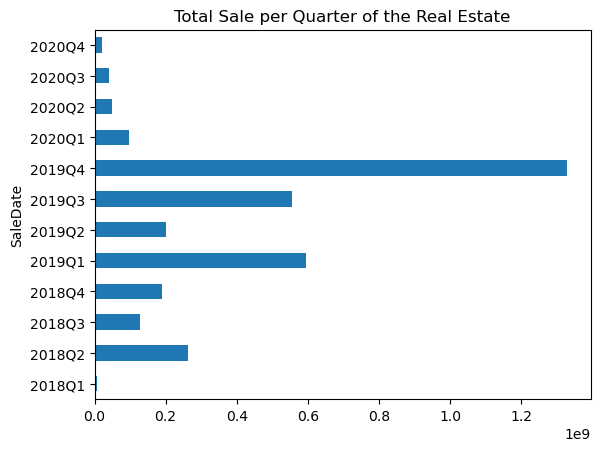

In [97]:
SaleperQuarterPlot=df.groupby(df['SaleDate'].dt.to_period('Q'))['SalePrice'].sum().plot(kind='barh', title='Total Sale per Quarter of the Real Estate')
display(SaleperQuarterPlot)

<AxesSubplot:title={'center':'Total Sale Price per Month of the Real Estate'}, xlabel='SaleDate'>

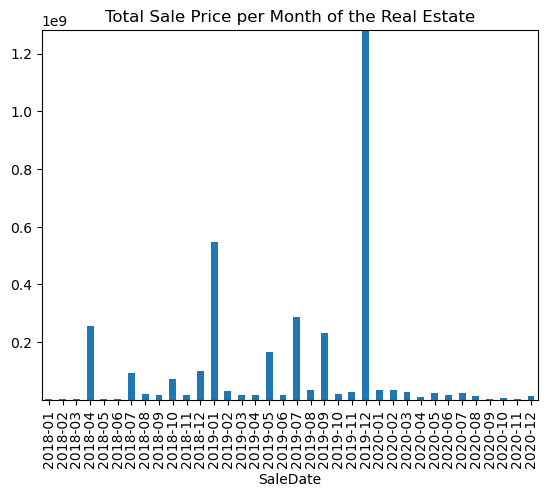

In [119]:
MonthSalePlot=df.groupby(df['SaleDate'].dt.to_period('M'))['SalePrice'].sum().plot(kind='bar',ylim=(1000000,1281788217),title='Total Sale Price per Month of the Real Estate')
display(MonthSalePlot)

<AxesSubplot:title={'center':'Total Sale Price per Year and  Month  '}, xlabel='SaleDate'>

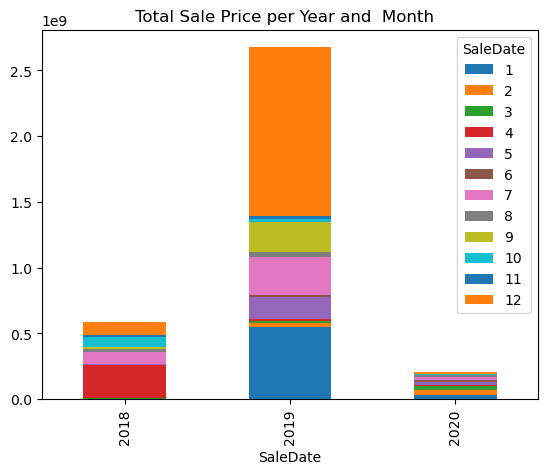

In [120]:
df.groupby([df.SaleDate.dt.year,df.SaleDate.dt.month])['SalePrice'].sum().unstack().plot(kind='bar', stacked=True, title='Total Sale Price per Year and  Month  ')

<AxesSubplot:title={'center':'Total Sale per Year and  Month  '}, xlabel='SaleDate'>

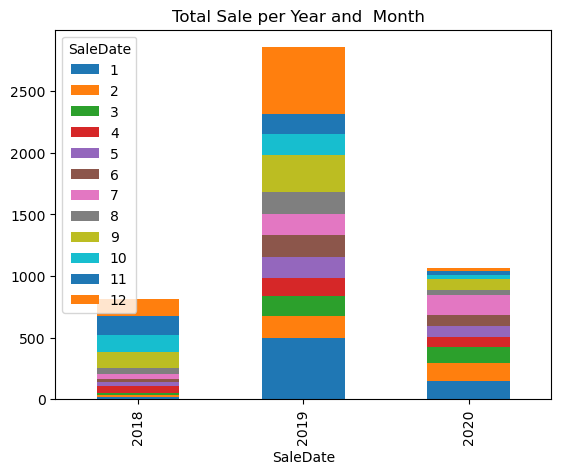

In [121]:
df.groupby([df.SaleDate.dt.year,df.SaleDate.dt.month]).size().unstack().plot(kind='bar', stacked=True, title='Total Sale per Year and  Month  ')

<AxesSubplot:title={'center':'Total Sale per Year and per Quarter  '}, ylabel='SaleDate'>

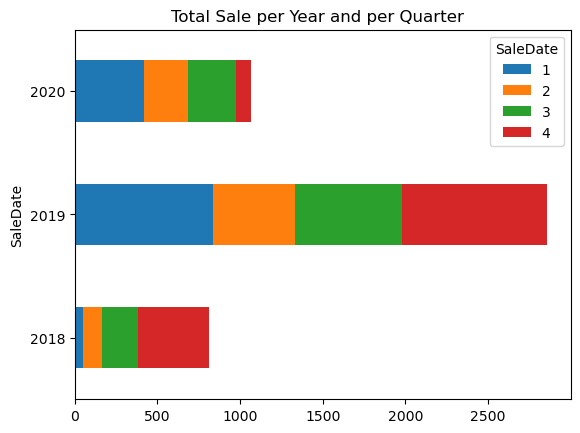

In [124]:
df.groupby([df.SaleDate.dt.year,df.SaleDate.dt.quarter]).size().unstack().plot(kind='barh', stacked=True, title='Total Sale per Year and per Quarter  ')